# Import 

In [2]:
import grid2op
from grid2op.PlotGrid import PlotMatplot 
from grid2op.utils import ScoreL2RPN2020
from grid2op.Runner import Runner
from grid2op.Reward import *
from grid2op.Action import *
import numpy as np
import pdb
import os
import copy
import pickle
import matplotlib.pyplot as plt

from train import train as train
from evaluate import evaluate as evaluate
from DoubleDuelingDQN import DoubleDuelingDQN as D3QNAgent

# Create Environment


In [3]:
env = grid2op.make('l2rpn_neurips_2020_track1_large',
                  action_class=TopologyChangeAndDispatchAction,
                  reward_class=CombinedScaledReward)

l2rpn_neurips_2020_track1_large.tar.bz2: 0.00B [00:00, ?B/s]

downloading the training data, this may take a while.


l2rpn_neurips_2020_track1_large.tar.bz2: 4.48GB [1:48:58, 685kB/s]             


Extract the tar archive in "C:\Users\Nada\data_grid2op"
You may now use the environment "l2rpn_neurips_2020_track1_large" with the available data by invoking:
	env = grid2op.make("l2rpn_neurips_2020_track1_large")


## Split train-val-test data 

In [5]:
nm_env_train, nm_env_val = env.train_val_split_random(pct_val=20., add_for_train = 'train', add_for_val = 'valtest')

env_valtest = grid2op.make('l2rpn_neurips_2020_track1_large_valtest',
                       action_class=TopologyChangeAndDispatchAction,
                       reward_class=CombinedScaledReward)

nm_env_val, nm_env_test = env_valtest.train_val_split_random(pct_val=50., add_for_train='val', add_for_val='test', remove_from_name='_valtest')

# Training

In [2]:
env_train = grid2op.make('l2rpn_neurips_2020_track1_large_train',
                  action_class=TopologyChangeAndDispatchAction,
                  reward_class=CombinedScaledReward)

# Only load 128 steps in ram
env_train.chronics_handler.set_chunk_size(128)

Step [0] -- Random [0.99]
Survived [1] steps
Total reward [-0.16869652271270752]
Survived [3] steps
Total reward [1.3615326881408691]
Survived [13] steps
Total reward [9.734930872917175]
Survived [0] steps
Total reward [-1.0]
Survived [9] steps
Total reward [4.698172330856323]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.1533050537109375]
Survived [2] steps
Total reward [0.7089439630508423]
Survived [2] steps
Total reward [0.6432726383209229]
Survived [9] steps
Total reward [5.1127840876579285]
Survived [2] steps
Total reward [0.7172998189926147]
Survived [2] steps
Total reward [0.549839973449707]
Survived [3] steps
Total reward [1.6177798509597778]
Survived [3] steps
Total reward [1.5289437770843506]
Survived [3] steps
Total reward [1.578619122505188]
Survived [4] steps
Total reward [2.1428229808807373]
Survived [4] steps
Total reward [2.3000223636627197]
Survived [9] steps
Total reward [6.412359833717346]
Survived [1] steps
Total reward [-0.1423740386962

Survived [6] steps
Total reward [4.141473650932312]
Survived [1] steps
Total reward [-0.18262863159179688]
Survived [8] steps
Total reward [4.6031845808029175]
Survived [0] steps
Total reward [-1.0]
Survived [8] steps
Total reward [5.617673873901367]
Survived [1] steps
Total reward [-0.20894169807434082]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [3.114881992340088]
Survived [0] steps
Total reward [-1.0]
Survived [2] steps
Total reward [0.717591404914856]
Survived [1] steps
Total reward [-0.1489574909210205]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.377665400505066]
Survived [3] steps
Total reward [1.559087872505188]
loss = 52.25388
Survived [1] steps
Total reward [-0.20165371894836426]
Survived [6] steps
Total reward [3.532458186149597]
Survived [2] steps
Total reward [0.6829627752304077]
Survived [4] steps
Total reward [2.3072785139083862]
Survived [10] steps
Total reward [5.9517742395401]
Survived [1] steps
Total reward [-0

loss = 21.478514
Survived [10] steps
Total reward [6.968756675720215]
Survived [4] steps
Total reward [1.4420943856239319]
Survived [3] steps
Total reward [0.6777024269104004]
Survived [5] steps
Total reward [2.6325284838676453]
Survived [3] steps
Total reward [1.4387234449386597]
Survived [3] steps
Total reward [1.5153493881225586]
Survived [3] steps
Total reward [1.559062123298645]
Survived [0] steps
Total reward [-1.0]
Survived [10] steps
Total reward [5.979590654373169]
Survived [4] steps
Total reward [2.30911922454834]
Survived [6] steps
Total reward [3.9003161191940308]
loss = 24.338856
Survived [10] steps
Total reward [6.651705086231232]
Survived [1] steps
Total reward [-0.18056929111480713]
Survived [6] steps
Total reward [3.9863438606262207]
Survived [6] steps
Total reward [3.4939827919006348]
Survived [3] steps
Total reward [0.7124249339103699]
Survived [2] steps
Total reward [0.20796418190002441]
Survived [2] steps
Total reward [0.7268097400665283]
Survived [3] steps
Total r

Survived [3] steps
Total reward [1.5270020961761475]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [2.9508897066116333]
Survived [3] steps
Total reward [1.4865270853042603]
loss = 7.8523664
Survived [2] steps
Total reward [0.7263624668121338]
Survived [3] steps
Total reward [1.5919171571731567]
Survived [1] steps
Total reward [-0.13901591300964355]
Survived [4] steps
Total reward [2.4114537239074707]
Survived [7] steps
Total reward [4.150401830673218]
Survived [8] steps
Total reward [5.31592857837677]
Survived [6] steps
Total reward [3.792671322822571]
Survived [7] steps
Total reward [4.87487256526947]
Survived [5] steps
Total reward [1.6130529642105103]
Survived [0] steps
Total reward [-1.0]
loss = 7.470951
Survived [9] steps
Total reward [5.790251076221466]
Survived [6] steps
Total reward [1.751515507698059]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.16628336906433105]
Survived [2] steps
Total reward [0.6972599029541016]
Surviv

Survived [2] steps
Total reward [0.506074070930481]
Survived [1] steps
Total reward [-0.253770112991333]
Survived [1] steps
Total reward [-0.2618863582611084]
Survived [6] steps
Total reward [3.4161431789398193]
Survived [6] steps
Total reward [3.1820870637893677]
Survived [2] steps
Total reward [0.47641420364379883]
loss = 4.093871
Survived [7] steps
Total reward [3.3109976053237915]
Survived [6] steps
Total reward [1.9470465779304504]
Survived [11] steps
Total reward [5.370347201824188]
Survived [11] steps
Total reward [5.527019679546356]
Survived [5] steps
Total reward [2.7437103986740112]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [12] steps
Total reward [6.929755926132202]
loss = 6.2917576
Survived [1] steps
Total reward [-0.2677900791168213]
Survived [3] steps
Total reward [1.2792532444000244]
Survived [6] steps
Total reward [2.69310861825943]
Survived [9] steps
Total reward [4.515465974807739]
Survived [1] steps
Total reward [-0.340397

Survived [12] steps
Total reward [7.175164818763733]
Survived [6] steps
Total reward [2.8556132316589355]
Survived [1] steps
Total reward [-0.18727660179138184]
loss = 3.0993464
Survived [4] steps
Total reward [2.1044750213623047]
Survived [3] steps
Total reward [1.290940284729004]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.2035523653030396]
Survived [2] steps
Total reward [0.5776314735412598]
Survived [6] steps
Total reward [3.875771164894104]
Survived [0] steps
Total reward [-1.0]
Survived [2] steps
Total reward [0.6706514358520508]
Survived [3] steps
Total reward [0.3733740448951721]
Survived [3] steps
Total reward [1.4359318017959595]
Survived [2] steps
Total reward [0.6400899887084961]
Survived [3] steps
Total reward [-0.2022377848625183]
Survived [2] steps
Total reward [0.6042394638061523]
Survived [1] steps
Total reward [-0.1544259786605835]
Survived [3] steps
Total reward [1.4683641195297241]
Survived [3] steps
Total reward [1.2898578643798828]
lo

Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.15786075592041016]
Survived [4] steps
Total reward [2.32720685005188]
Survived [1] steps
Total reward [-0.16276919841766357]
Survived [2] steps
Total reward [0.6270092725753784]
Survived [8] steps
Total reward [4.8482972383499146]
Survived [3] steps
Total reward [1.069462537765503]
Survived [7] steps
Total reward [3.570559322834015]
Survived [5] steps
Total reward [3.0932374000549316]
Survived [3] steps
Total reward [1.5487768650054932]
Survived [4] steps
Total reward [2.1434662342071533]
loss = 10.273775
Survived [5] steps
Total reward [3.1067590713500977]
Survived [9] steps
Total reward [5.5021286606788635]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.0807762145996094]
Survived [8] steps
Total reward [3.603946328163147]
Survived [15] steps
Total reward [9.54040378332138]
Survived [5] steps
Total reward [2.8321776390075684]
Survived [0] steps
Total reward [-1.0]
loss = 1.1266668
Sur

loss = 3.4744084
Survived [7] steps
Total reward [3.649631977081299]
Survived [4] steps
Total reward [2.4479979276657104]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [3.2959810495376587]
Survived [2] steps
Total reward [0.7052741050720215]
Survived [3] steps
Total reward [1.2344096899032593]
Survived [7] steps
Total reward [4.917145371437073]
Survived [6] steps
Total reward [3.5084733963012695]
Survived [1] steps
Total reward [-0.1198732852935791]
Survived [8] steps
Total reward [3.592900574207306]
loss = 5.0246716
Survived [5] steps
Total reward [3.385785698890686]
Survived [21] steps
Total reward [15.021971821784973]
Survived [8] steps
Total reward [4.754969656467438]
Survived [4] steps
Total reward [1.8419841527938843]
loss = 3.5450814
Survived [23] steps
Total reward [14.210211217403412]
Survived [7] steps
Total reward [3.304835855960846]
Survived [1] steps
Total reward [-0.12887346744537354]
Survived [2] steps
Total reward [0.7031742334365845]
Survived [

Survived [5] steps
Total reward [1.8137720227241516]
Survived [3] steps
Total reward [1.493285059928894]
Survived [4] steps
Total reward [2.375575065612793]
Survived [9] steps
Total reward [6.857628583908081]
Survived [0] steps
Total reward [-1.0]
Survived [8] steps
Total reward [5.957689523696899]
loss = 3.607418
Survived [15] steps
Total reward [9.621018826961517]
Survived [2] steps
Total reward [0.6869860887527466]
Survived [15] steps
Total reward [11.204353749752045]
Survived [1] steps
Total reward [-0.1453545093536377]
Survived [7] steps
Total reward [4.357823014259338]
Survived [9] steps
Total reward [6.649766564369202]
Survived [7] steps
Total reward [4.077977418899536]
loss = 4.4250665
Survived [10] steps
Total reward [5.799207270145416]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.14515900611877441]
Survived [19] steps
Total reward [11.02530437707901]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.14181411266326904]
Sur

Survived [6] steps
Total reward [3.4903790950775146]
Survived [1] steps
Total reward [-0.20104241371154785]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [0.9167584180831909]
loss = 2.1728191
Survived [7] steps
Total reward [4.044939160346985]
Survived [8] steps
Total reward [5.165041923522949]
Survived [2] steps
Total reward [0.6009445190429688]
Survived [1] steps
Total reward [-0.23920512199401855]
Survived [3] steps
Total reward [1.150400161743164]
Survived [9] steps
Total reward [4.657117247581482]
Survived [5] steps
Total reward [2.871972680091858]
Survived [1] steps
Total reward [-0.21369385719299316]
Survived [13] steps
Total reward [6.130644142627716]
loss = 4.486505
Survived [8] steps
Total reward [3.0017608404159546]
Survived [5] steps
Total reward [2.9416310787200928]
Survived [0] steps
Total reward [-1.0]
Survived [8] steps
Total reward [4.030889391899109]
Survived [9] steps
Total reward [5.77135956287384]
Survived [5] steps
Total reward [2.89593374

loss = 1.4311687
Survived [16] steps
Total reward [7.030802249908447]
Survived [4] steps
Total reward [2.2025651931762695]
Survived [4] steps
Total reward [1.4383926391601562]
Survived [8] steps
Total reward [4.8546531200408936]
Survived [6] steps
Total reward [2.2739405035972595]
Survived [5] steps
Total reward [2.158888280391693]
Survived [2] steps
Total reward [0.6227754354476929]
Survived [2] steps
Total reward [0.6007333993911743]
Survived [0] steps
Total reward [-1.0]
Survived [1] steps
Total reward [-0.2149416208267212]
Survived [1] steps
Total reward [-0.20734715461730957]
loss = 0.68031704
Survived [12] steps
Total reward [6.680501401424408]
Survived [3] steps
Total reward [1.3977223634719849]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [2.8140504360198975]
Survived [4] steps
Total reward [0.547710120677948]
Survived [6] steps
Total reward [3.6791919469833374]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [2.7309354543685913]

Survived [4] steps
Total reward [2.4105385541915894]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.566585898399353]
Survived [12] steps
Total reward [6.800509989261627]
Survived [2] steps
Total reward [0.6963181495666504]
Survived [3] steps
Total reward [1.5708849430084229]
Survived [2] steps
Total reward [0.7344013452529907]
Survived [3] steps
Total reward [1.6072604656219482]
Survived [5] steps
Total reward [3.2908830642700195]
loss = 0.26586774
Survived [21] steps
Total reward [15.928355097770691]
Survived [11] steps
Total reward [6.268529713153839]
Survived [6] steps
Total reward [4.173164486885071]
Survived [0] steps
Total reward [-1.0]
loss = 0.3813306
Survived [16] steps
Total reward [9.7410209774971]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [3.3348857164382935]
Survived [0] steps
Total reward [-1.0]
Survived [8] steps
Total reward [5.097073435783386]
Survived [5] steps
Total reward 

loss = 0.44219273
Survived [8] steps
Total reward [4.95293664932251]
Survived [2] steps
Total reward [0.7009429931640625]
Survived [8] steps
Total reward [4.395739436149597]
Survived [5] steps
Total reward [2.3988545536994934]
Survived [3] steps
Total reward [1.5645731687545776]
Survived [4] steps
Total reward [2.3058409690856934]
Survived [7] steps
Total reward [3.8966574668884277]
Survived [0] steps
Total reward [-1.0]
Survived [5] steps
Total reward [3.0836503505706787]
loss = 0.44370604
Survived [5] steps
Total reward [2.56909716129303]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [8] steps
Total reward [5.769244074821472]
Survived [12] steps
Total reward [8.549185514450073]
Survived [8] steps
Total reward [3.7170335054397583]
Survived [9] steps
Total reward [5.8210336565971375]
Survived [3] steps
Total reward [1.5515128374099731]
Survived [1] steps
Total reward [-0.1460665464401245]
loss = 0.3737816
Survived [6] steps
Total reward [4.03353

Survived [8] steps
Total reward [5.623676180839539]
Survived [4] steps
Total reward [2.2942044734954834]
loss = 0.47404927
Survived [11] steps
Total reward [6.9982688426971436]
Survived [4] steps
Total reward [2.2742351293563843]
Survived [7] steps
Total reward [4.718571305274963]
Survived [2] steps
Total reward [0.6355069875717163]
Survived [3] steps
Total reward [1.573606014251709]
Survived [3] steps
Total reward [1.3592158555984497]
Survived [3] steps
Total reward [1.536275029182434]
Survived [6] steps
Total reward [2.358603775501251]
Survived [4] steps
Total reward [2.375269293785095]
loss = 0.3010728
Survived [5] steps
Total reward [2.707498788833618]
Survived [3] steps
Total reward [1.584243655204773]
Survived [8] steps
Total reward [5.328168153762817]
Survived [7] steps
Total reward [3.8690532445907593]
Survived [1] steps
Total reward [-0.15690743923187256]
Survived [3] steps
Total reward [1.5210305452346802]
Survived [8] steps
Total reward [5.498812437057495]
Survived [15] step

Survived [12] steps
Total reward [8.791367173194885]
Survived [5] steps
Total reward [3.0862821340560913]
Survived [2] steps
Total reward [0.6806161403656006]
loss = 0.6310274
Survived [2] steps
Total reward [0.6798610687255859]
Survived [1] steps
Total reward [-0.16122353076934814]
Survived [8] steps
Total reward [4.971071004867554]
Survived [13] steps
Total reward [6.291582107543945]
Survived [3] steps
Total reward [1.42104971408844]
Survived [10] steps
Total reward [5.073275566101074]
Survived [7] steps
Total reward [1.8054469227790833]
Survived [2] steps
Total reward [0.6834632158279419]
loss = 0.44347703
Survived [4] steps
Total reward [2.3280184268951416]
Survived [5] steps
Total reward [3.1919363737106323]
Survived [6] steps
Total reward [3.849418878555298]
Survived [5] steps
Total reward [2.385420083999634]
Survived [2] steps
Total reward [0.6629793643951416]
Survived [0] steps
Total reward [-1.0]
Survived [9] steps
Total reward [5.390751540660858]
Survived [3] steps
Total rewa

Survived [19] steps
Total reward [13.724776029586792]
Survived [6] steps
Total reward [3.93933641910553]
loss = 0.48940486
Survived [2] steps
Total reward [0.6978166103363037]
Survived [3] steps
Total reward [1.4835208654403687]
Survived [12] steps
Total reward [7.763047933578491]
Survived [3] steps
Total reward [1.1073129177093506]
Survived [20] steps
Total reward [8.493874192237854]
Survived [6] steps
Total reward [3.113886058330536]
Survived [4] steps
Total reward [1.4306775331497192]
loss = 0.3890761
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [1.719642162322998]
Survived [3] steps
Total reward [1.4644073247909546]
Survived [0] steps
Total reward [-1.0]
Survived [2] steps
Total reward [0.6383180618286133]
Survived [12] steps
Total reward [8.84752893447876]
Survived [3] steps
Total reward [1.476241111755371]
Survived [4] steps
Total reward [2.1620256900787354]
Survived [3] steps
Total reward [1.2573803663253784]
Survi

loss = 0.14332676
Survived [7] steps
Total reward [4.02873432636261]
Survived [5] steps
Total reward [2.903684377670288]
Survived [8] steps
Total reward [5.326757073402405]
Survived [2] steps
Total reward [0.5759847164154053]
Survived [5] steps
Total reward [3.2731624841690063]
Survived [0] steps
Total reward [-1.0]
Survived [8] steps
Total reward [5.658137321472168]
Survived [0] steps
Total reward [-1.0]
Survived [7] steps
Total reward [3.2168882489204407]
Survived [4] steps
Total reward [2.372393250465393]
loss = 0.32931787
Survived [5] steps
Total reward [2.4658144116401672]
Survived [17] steps
Total reward [8.981864511966705]
Survived [3] steps
Total reward [1.5827226638793945]
Survived [6] steps
Total reward [3.0473174452781677]
Survived [11] steps
Total reward [6.624774992465973]
Survived [6] steps
Total reward [3.2741138339042664]
loss = 0.37063769
Survived [11] steps
Total reward [8.40063214302063]
Survived [3] steps
Total reward [1.570631742477417]
Survived [5] steps
Total rew

Survived [3] steps
Total reward [1.4219197034835815]
loss = 0.083514996
Survived [5] steps
Total reward [2.3775556087493896]
Survived [2] steps
Total reward [0.7014145851135254]
Survived [10] steps
Total reward [5.636816084384918]
Survived [15] steps
Total reward [8.398736834526062]
Survived [2] steps
Total reward [0.638073205947876]
Survived [2] steps
Total reward [0.687183141708374]
Survived [5] steps
Total reward [3.145411729812622]
Survived [3] steps
Total reward [1.5763252973556519]
loss = 0.031500272
Survived [8] steps
Total reward [3.966340959072113]
Survived [6] steps
Total reward [3.2853803634643555]
Survived [11] steps
Total reward [3.6945002675056458]
Survived [1] steps
Total reward [-0.1654820442199707]
Survived [3] steps
Total reward [1.5839895009994507]
Survived [4] steps
Total reward [2.198414444923401]
Survived [3] steps
Total reward [1.3895814418792725]
Survived [3] steps
Total reward [1.5436387062072754]
Survived [4] steps
Total reward [2.2647955417633057]
Survived [9

Survived [2] steps
Total reward [0.7321717739105225]
Survived [5] steps
Total reward [3.212726593017578]
Survived [0] steps
Total reward [-1.0]
loss = 0.08051884
Survived [5] steps
Total reward [3.1230794191360474]
Survived [1] steps
Total reward [-0.15657973289489746]
Survived [11] steps
Total reward [6.64671665430069]
Survived [1] steps
Total reward [-0.14087891578674316]
Survived [5] steps
Total reward [2.436970829963684]
Survived [6] steps
Total reward [4.031774282455444]
Survived [15] steps
Total reward [10.022833526134491]
loss = 0.044428606
Survived [19] steps
Total reward [7.256229102611542]
Survived [6] steps
Total reward [3.2954389452934265]
Survived [2] steps
Total reward [0.6423888206481934]
Survived [7] steps
Total reward [4.759088754653931]
Survived [5] steps
Total reward [2.526204466819763]
Survived [3] steps
Total reward [1.5410524606704712]
Survived [4] steps
Total reward [1.568788766860962]
Survived [4] steps
Total reward [2.401384949684143]
Survived [3] steps
Total r

Survived [9] steps
Total reward [3.976964294910431]
loss = 0.024612555
Survived [6] steps
Total reward [2.4883938431739807]
Survived [15] steps
Total reward [8.975516498088837]
Survived [6] steps
Total reward [3.2241262793540955]
Survived [22] steps
Total reward [11.188737988471985]
Survived [5] steps
Total reward [3.2552812099456787]
loss = 0.024573378
Survived [3] steps
Total reward [1.4191820621490479]
Survived [9] steps
Total reward [5.627670049667358]
Survived [8] steps
Total reward [5.01017826795578]
Survived [2] steps
Total reward [0.7162854671478271]
Survived [3] steps
Total reward [1.5927495956420898]
Survived [12] steps
Total reward [6.082695484161377]
loss = 0.037804034
Survived [14] steps
Total reward [6.988218605518341]
Survived [11] steps
Total reward [5.53873085975647]
Survived [4] steps
Total reward [2.2943191528320312]
Survived [7] steps
Total reward [4.5744863748550415]
Survived [9] steps
Total reward [3.5171658992767334]
Survived [3] steps
Total reward [1.44483947753

Survived [5] steps
Total reward [2.3089258670806885]
Survived [3] steps
Total reward [1.2645337581634521]
Survived [3] steps
Total reward [1.2759088277816772]
Survived [5] steps
Total reward [2.6809134483337402]
Survived [13] steps
Total reward [7.428358674049377]
Survived [2] steps
Total reward [0.43585896492004395]
Survived [2] steps
Total reward [0.48686039447784424]
Survived [6] steps
Total reward [3.1009241342544556]
loss = 0.03279776
Survived [20] steps
Total reward [13.127025246620178]
Survived [3] steps
Total reward [1.2804573774337769]
Survived [11] steps
Total reward [7.179736256599426]
Survived [5] steps
Total reward [2.6044669151306152]
Survived [6] steps
Total reward [3.249279260635376]
loss = 0.029970232
Survived [22] steps
Total reward [13.827603220939636]
Survived [3] steps
Total reward [1.2051912546157837]
Survived [4] steps
Total reward [1.7930935621261597]
Survived [6] steps
Total reward [3.4345881938934326]
Survived [8] steps
Total reward [3.6116913557052612]
Surviv

Survived [7] steps
Total reward [3.940307319164276]
Survived [3] steps
Total reward [1.4233601093292236]
Survived [5] steps
Total reward [3.112394332885742]
Survived [3] steps
Total reward [0.8346247673034668]
loss = 0.051884625
Survived [4] steps
Total reward [2.292902112007141]
Survived [4] steps
Total reward [2.1334367990493774]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.3012129068374634]
Survived [5] steps
Total reward [2.984752058982849]
Survived [3] steps
Total reward [1.5251246690750122]
Survived [2] steps
Total reward [0.5997039079666138]
Survived [6] steps
Total reward [3.081663966178894]
Survived [7] steps
Total reward [3.8981138467788696]
loss = 0.0704959
Survived [23] steps
Total reward [8.858541488647461]
Survived [1] steps
Total reward [-0.15422451496124268]
Survived [6] steps
Total reward [3.316399872303009]
Survived [10] steps
Total reward [6.9757678508758545]
Survived [6] steps
Total reward [3.2002822160720825]
Survived [3] steps
Total re

Survived [1] steps
Total reward [-0.15157389640808105]
Survived [22] steps
Total reward [15.793724298477173]
Survived [6] steps
Total reward [4.09553325176239]
Survived [1] steps
Total reward [-0.13117551803588867]
Survived [13] steps
Total reward [7.416674256324768]
loss = 0.029513242
Survived [11] steps
Total reward [6.094274878501892]
Survived [3] steps
Total reward [1.5749268531799316]
Survived [2] steps
Total reward [0.7499895095825195]
Survived [4] steps
Total reward [2.3722869157791138]
Survived [0] steps
Total reward [-1.0]
Survived [20] steps
Total reward [8.907483577728271]
Survived [6] steps
Total reward [3.2135207056999207]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.5907460451126099]
loss = 0.05452338
Survived [8] steps
Total reward [4.259662866592407]
Survived [1] steps
Total reward [-0.14428138732910156]
Survived [2] steps
Total reward [0.7331371307373047]
Survived [9] steps
Total reward [5.257993698120117]
Survived [7] steps
Total reward [4

Survived [3] steps
Total reward [1.4666798114776611]
Survived [3] steps
Total reward [1.5038312673568726]
Survived [14] steps
Total reward [8.84407639503479]
Survived [4] steps
Total reward [2.412336826324463]
Survived [7] steps
Total reward [4.247613608837128]
loss = 0.06490456
Survived [9] steps
Total reward [5.384952127933502]
Survived [4] steps
Total reward [2.422791600227356]
Survived [17] steps
Total reward [10.045751750469208]
Survived [7] steps
Total reward [5.082695484161377]
Survived [6] steps
Total reward [3.4904013872146606]
loss = 0.036621254
Survived [10] steps
Total reward [6.145663261413574]
Survived [3] steps
Total reward [1.6176267862319946]
Survived [13] steps
Total reward [6.067458212375641]
Survived [11] steps
Total reward [6.159347593784332]
Survived [9] steps
Total reward [4.833422541618347]
Survived [3] steps
Total reward [1.3691080808639526]
Survived [7] steps
Total reward [3.5189226865768433]
loss = 0.0748646
Survived [16] steps
Total reward [8.254199504852295

Survived [5] steps
Total reward [3.0691282749176025]
Survived [7] steps
Total reward [1.8256471753120422]
Survived [34] steps
Total reward [25.477983713150024]
loss = 0.04231819
Survived [15] steps
Total reward [7.9272918701171875]
Survived [29] steps
Total reward [13.535691797733307]
Survived [1] steps
Total reward [-0.14686715602874756]
Survived [2] steps
Total reward [0.7812308073043823]
Survived [1] steps
Total reward [-0.13122034072875977]
Survived [3] steps
Total reward [1.5705814361572266]
Survived [0] steps
Total reward [-1.0]
loss = 0.032250058
Survived [5] steps
Total reward [2.3195239305496216]
Survived [7] steps
Total reward [3.097432017326355]
Survived [7] steps
Total reward [4.990250945091248]
Survived [2] steps
Total reward [0.7630528211593628]
Survived [10] steps
Total reward [5.501781582832336]
Survived [15] steps
Total reward [11.97115957736969]
Survived [4] steps
Total reward [1.7015430331230164]
loss = 0.044064026
Survived [4] steps
Total reward [2.391735076904297]


Survived [12] steps
Total reward [5.26923942565918]
Survived [7] steps
Total reward [2.2436941862106323]
Survived [8] steps
Total reward [4.878263711929321]
Survived [1] steps
Total reward [-0.21327602863311768]
Survived [6] steps
Total reward [2.9571420550346375]
Survived [5] steps
Total reward [2.863661050796509]
Survived [7] steps
Total reward [2.027352064847946]
Survived [7] steps
Total reward [2.8748810291290283]
loss = 0.054113373
Survived [26] steps
Total reward [12.687348008155823]
Survived [6] steps
Total reward [2.8554067611694336]
Survived [6] steps
Total reward [2.742741882801056]
Survived [4] steps
Total reward [2.1409425735473633]
Survived [10] steps
Total reward [3.1095380187034607]
loss = 0.032261837
Survived [28] steps
Total reward [10.651412308216095]
Survived [3] steps
Total reward [1.3476604223251343]
Survived [5] steps
Total reward [2.9167052507400513]
Survived [3] steps
Total reward [1.3208757638931274]
Step [23000] -- Random [0.3852558158469933]
Successfully save

Survived [3] steps
Total reward [1.581621527671814]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [1.841057538986206]
loss = 0.04521904
Survived [6] steps
Total reward [2.973713457584381]
Survived [13] steps
Total reward [5.664919078350067]
Survived [2] steps
Total reward [0.385398268699646]
Survived [2] steps
Total reward [0.7185118198394775]
Survived [4] steps
Total reward [2.4022992849349976]
Survived [5] steps
Total reward [3.327166795730591]
Survived [7] steps
Total reward [3.5243386030197144]
Survived [5] steps
Total reward [2.3822948336601257]
Survived [1] steps
Total reward [-0.13522052764892578]
Survived [3] steps
Total reward [1.6513258218765259]
loss = 0.056748208
Survived [6] steps
Total reward [3.241444706916809]
Survived [3] steps
Total reward [1.5603913068771362]
Survived [6] steps
Total reward [4.006699204444885]
Survived [3] steps
Total reward [1.4748923778533936]
Survived [7] steps
Total reward [4.222936749458313]
Survived [8] steps
Total rewa

Survived [4] steps
Total reward [1.3005079627037048]
Survived [5] steps
Total reward [3.172774910926819]
Survived [3] steps
Total reward [1.6291662454605103]
Survived [7] steps
Total reward [3.8408570289611816]
Survived [4] steps
Total reward [2.459390163421631]
Survived [7] steps
Total reward [3.9215893745422363]
Survived [8] steps
Total reward [5.903741240501404]
Survived [3] steps
Total reward [1.060827612876892]
loss = 0.033905543
Survived [21] steps
Total reward [11.407322824001312]
Survived [23] steps
Total reward [17.97604411840439]
Survived [2] steps
Total reward [0.7731457948684692]
loss = 0.027395975
Survived [16] steps
Total reward [9.162935376167297]
Survived [3] steps
Total reward [1.6237062215805054]
Survived [5] steps
Total reward [3.4341334104537964]
Survived [2] steps
Total reward [0.7379570007324219]
Survived [15] steps
Total reward [6.022540271282196]
Survived [6] steps
Total reward [2.697976291179657]
loss = 0.028070798
Survived [26] steps
Total reward [13.585962951

loss = 0.08546625
Survived [17] steps
Total reward [8.341247498989105]
Survived [12] steps
Total reward [6.522218286991119]
Survived [24] steps
Total reward [13.28424859046936]
loss = 0.028524868
Survived [4] steps
Total reward [1.5432026386260986]
Survived [3] steps
Total reward [1.5518943071365356]
Survived [11] steps
Total reward [6.936522364616394]
Survived [4] steps
Total reward [2.4965388774871826]
Survived [1] steps
Total reward [-0.14527344703674316]
Survived [6] steps
Total reward [1.7789145112037659]
Survived [6] steps
Total reward [3.3536741137504578]
Survived [8] steps
Total reward [2.8795127868652344]
loss = 0.017943086
Survived [7] steps
Total reward [3.5596200227737427]
Survived [4] steps
Total reward [2.3031610250473022]
Survived [2] steps
Total reward [0.7293014526367188]
Survived [5] steps
Total reward [3.016184687614441]
Survived [3] steps
Total reward [1.4488329887390137]
Survived [20] steps
Total reward [12.178419530391693]
Survived [5] steps
Total reward [3.247233

Survived [2] steps
Total reward [0.7407312393188477]
Survived [5] steps
Total reward [3.04757821559906]
Survived [26] steps
Total reward [13.140497922897339]
Survived [3] steps
Total reward [1.4437884092330933]
Survived [3] steps
Total reward [1.6117627620697021]
Survived [1] steps
Total reward [-0.14024090766906738]
loss = 0.022494366
Survived [9] steps
Total reward [4.546492576599121]
Survived [0] steps
Total reward [-1.0]
Survived [11] steps
Total reward [6.9911558628082275]
Survived [35] steps
Total reward [13.08474200963974]
loss = 0.0467194
Survived [14] steps
Total reward [7.026662886142731]
Survived [9] steps
Total reward [3.325258493423462]
Survived [20] steps
Total reward [14.656183779239655]
Survived [3] steps
Total reward [1.5554165840148926]
loss = 0.03291112
Survived [17] steps
Total reward [10.447939336299896]
Survived [0] steps
Total reward [-1.0]
Survived [2] steps
Total reward [0.7130937576293945]
Survived [3] steps
Total reward [1.440771222114563]
Survived [11] steps

Survived [7] steps
Total reward [3.2265222668647766]
Survived [1] steps
Total reward [-0.15242648124694824]
Survived [8] steps
Total reward [3.2023465633392334]
Survived [3] steps
Total reward [1.5294475555419922]
loss = 0.040730298
Survived [13] steps
Total reward [5.9869407415390015]
Survived [3] steps
Total reward [1.4919801950454712]
Survived [9] steps
Total reward [4.824937105178833]
Survived [20] steps
Total reward [8.608735799789429]
Survived [7] steps
Total reward [3.173102617263794]
loss = 0.0328278
Survived [7] steps
Total reward [4.641893982887268]
Survived [4] steps
Total reward [2.2779672145843506]
Survived [6] steps
Total reward [3.13765025138855]
Survived [2] steps
Total reward [0.6394127607345581]
Survived [4] steps
Total reward [2.316686272621155]
Survived [5] steps
Total reward [2.9386327266693115]
Survived [5] steps
Total reward [2.97310209274292]
Survived [0] steps
Total reward [-1.0]
Step [29000] -- Random [0.30546984718405956]
Successfully saved model at: saved_ag

Survived [28] steps
Total reward [22.890879273414612]
Survived [10] steps
Total reward [3.2944462299346924]
loss = 0.019969823
Survived [3] steps
Total reward [1.5202181339263916]
Survived [26] steps
Total reward [20.077831983566284]
Survived [4] steps
Total reward [2.2056849002838135]
Survived [1] steps
Total reward [-0.198125958442688]
Survived [0] steps
Total reward [-1.0]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.4440972805023193]
loss = 0.022454698
Survived [20] steps
Total reward [15.558209896087646]
Survived [3] steps
Total reward [1.3829858303070068]
Survived [3] steps
Total reward [1.5038683414459229]
Survived [26] steps
Total reward [20.39097809791565]
Survived [0] steps
Total reward [-1.0]
Survived [6] steps
Total reward [2.916003465652466]
Survived [4] steps
Total reward [2.213621735572815]
loss = 0.018099513
Survived [14] steps
Total reward [6.842903792858124]
Survived [2] steps
Total reward [0.7155551910400391]
Survived [10] steps
Total rew

Survived [35] steps
Total reward [18.523135781288147]
loss = 0.026089756
Survived [12] steps
Total reward [5.454616069793701]
Survived [34] steps
Total reward [27.013058483600616]
Survived [10] steps
Total reward [6.604694664478302]
loss = 0.020921744
Survived [6] steps
Total reward [3.6099694967269897]
Survived [11] steps
Total reward [6.774592339992523]
Survived [4] steps
Total reward [2.443238854408264]
Survived [4] steps
Total reward [2.396974563598633]
Survived [13] steps
Total reward [6.430640876293182]
Survived [3] steps
Total reward [1.427876353263855]
Survived [3] steps
Total reward [1.497458815574646]
Survived [3] steps
Total reward [1.5316449403762817]
loss = 0.034433406
Survived [4] steps
Total reward [2.361266851425171]
Survived [44] steps
Total reward [21.94886600971222]
loss = 0.017089572
Survived [20] steps
Total reward [7.9200451374053955]
Survived [27] steps
Total reward [10.328289210796356]
Survived [3] steps
Total reward [1.5931484699249268]
loss = 0.051986728
Survi

Survived [3] steps
Total reward [1.5355417728424072]
Survived [3] steps
Total reward [1.557204008102417]
Survived [9] steps
Total reward [3.545157253742218]
Survived [5] steps
Total reward [2.4013238549232483]
loss = 0.018217474
Survived [6] steps
Total reward [2.516286015510559]
Survived [3] steps
Total reward [1.4776790142059326]
Survived [4] steps
Total reward [2.384685754776001]
Survived [9] steps
Total reward [6.563931584358215]
Survived [14] steps
Total reward [6.579811334609985]
Survived [3] steps
Total reward [1.546704649925232]
Survived [4] steps
Total reward [2.408193588256836]
Survived [3] steps
Total reward [1.5374088287353516]
loss = 0.01636326
Survived [17] steps
Total reward [9.677802562713623]
Survived [4] steps
Total reward [2.4105637073516846]
Survived [12] steps
Total reward [5.583898484706879]
Survived [15] steps
Total reward [11.871173858642578]
Survived [3] steps
Total reward [1.4555165767669678]
loss = 0.03542454
Survived [11] steps
Total reward [3.80605626106262

Survived [3] steps
Total reward [1.5956411361694336]
Survived [16] steps
Total reward [9.711534261703491]
Survived [12] steps
Total reward [4.77341628074646]
Survived [3] steps
Total reward [1.5946753025054932]
Survived [4] steps
Total reward [2.380229115486145]
Survived [3] steps
Total reward [1.125525712966919]
loss = 0.008913345
Survived [9] steps
Total reward [4.447196424007416]
Survived [1] steps
Total reward [-0.1374964714050293]
Survived [6] steps
Total reward [2.5289226770401]
Survived [12] steps
Total reward [5.535885512828827]
Survived [2] steps
Total reward [0.7179601192474365]
Survived [12] steps
Total reward [4.84649795293808]
Survived [2] steps
Total reward [0.7297577857971191]
Step [35000] -- Random [0.2381977703275661]
loss = 0.013748888
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large35000.h5
Survived [13] steps
Total reward [9.768763899803162]
Survived [7] steps
Total reward [2.7465803623199463]
Survived

Survived [2] steps
Total reward [0.7383902072906494]
Survived [9] steps
Total reward [5.085363745689392]
Survived [17] steps
Total reward [9.060584545135498]
Survived [2] steps
Total reward [0.7361489534378052]
loss = 0.014850838
Survived [10] steps
Total reward [4.26109915971756]
Survived [10] steps
Total reward [5.740903794765472]
Survived [3] steps
Total reward [1.589672327041626]
Survived [9] steps
Total reward [4.393178761005402]
Survived [10] steps
Total reward [4.376913607120514]
Survived [3] steps
Total reward [1.5947659015655518]
Survived [9] steps
Total reward [4.817595601081848]
loss = 0.011025526
Survived [7] steps
Total reward [3.1778078079223633]
Survived [31] steps
Total reward [14.954230427742004]
Survived [2] steps
Total reward [0.7195947170257568]
Survived [1] steps
Total reward [-0.13666486740112305]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [1.6539270877838135]
loss = 0.006781988
Survived [20] steps
Total reward [9.723706901073456]
Survi

Survived [3] steps
Total reward [1.2166528701782227]
Survived [6] steps
Total reward [3.42288875579834]
Survived [6] steps
Total reward [3.464627504348755]
Survived [2] steps
Total reward [0.5003106594085693]
Survived [3] steps
Total reward [1.214281439781189]
Survived [4] steps
Total reward [2.0361227989196777]
Survived [3] steps
Total reward [1.2165734767913818]
Survived [4] steps
Total reward [1.98934805393219]
Survived [0] steps
Total reward [-1.0]
Survived [3] steps
Total reward [1.2853991985321045]
Survived [3] steps
Total reward [1.201951503753662]
loss = 0.0054506036
Survived [4] steps
Total reward [1.9969992637634277]
Survived [3] steps
Total reward [1.238288402557373]
Survived [3] steps
Total reward [1.207655429840088]
Survived [3] steps
Total reward [1.183130145072937]
Survived [5] steps
Total reward [2.7614200115203857]
Survived [6] steps
Total reward [3.5102585554122925]
Survived [4] steps
Total reward [1.971548080444336]
Survived [3] steps
Total reward [1.235398530960083]

Survived [7] steps
Total reward [4.6576011180877686]
Survived [7] steps
Total reward [3.6232187151908875]
Survived [3] steps
Total reward [1.5065959692001343]
Survived [3] steps
Total reward [1.3461631536483765]
Survived [7] steps
Total reward [2.6524569392204285]
Survived [3] steps
Total reward [1.5444345474243164]
Survived [3] steps
Total reward [1.5449587106704712]
loss = 0.0036343448
Survived [8] steps
Total reward [3.1664817929267883]
Survived [3] steps
Total reward [1.4936925172805786]
Survived [3] steps
Total reward [1.4680593013763428]
Survived [3] steps
Total reward [1.448803186416626]
Survived [5] steps
Total reward [3.1315059661865234]
Survived [3] steps
Total reward [1.3766505718231201]
Survived [3] steps
Total reward [1.4572124481201172]
Survived [3] steps
Total reward [1.4396498203277588]
Survived [13] steps
Total reward [7.758916795253754]
Survived [5] steps
Total reward [2.1877506375312805]
loss = 0.019435775
Survived [6] steps
Total reward [3.0699674487113953]
Survived

Survived [1] steps
Total reward [-0.1574622392654419]
Survived [8] steps
Total reward [3.9997124075889587]
loss = 0.010154847
Survived [11] steps
Total reward [4.832007646560669]
Survived [7] steps
Total reward [3.6511521339416504]
Survived [12] steps
Total reward [4.654596388339996]
Survived [7] steps
Total reward [2.03464537858963]
Survived [7] steps
Total reward [4.115384936332703]
Survived [6] steps
Total reward [3.9630074501037598]
Survived [3] steps
Total reward [0.9958760738372803]
loss = 0.0062934826
Survived [11] steps
Total reward [8.585659265518188]
loss = 0.005725889
Survived [44] steps
Total reward [19.284919559955597]
Survived [7] steps
Total reward [5.263235092163086]
Survived [39] steps
Total reward [17.714585423469543]
Survived [4] steps
Total reward [2.471319317817688]
loss = 0.008050647
Survived [3] steps
Total reward [1.155250906944275]
Survived [51] steps
Total reward [21.46546494960785]
loss = 0.004085955
Survived [3] steps
Total reward [1.6278966665267944]
Surviv

loss = 0.006163343
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large42000.h5
Survived [42] steps
Total reward [18.110336124897003]
Survived [3] steps
Total reward [1.6268424987792969]
Survived [20] steps
Total reward [16.828078627586365]
Survived [3] steps
Total reward [1.5875176191329956]
Survived [17] steps
Total reward [7.671742141246796]
Survived [3] steps
Total reward [1.6004012823104858]
loss = 0.007138749
Survived [4] steps
Total reward [2.499662399291992]
Survived [4] steps
Total reward [2.4895933866500854]
Survived [13] steps
Total reward [6.941335022449493]
Survived [2] steps
Total reward [0.7382467985153198]
Survived [9] steps
Total reward [5.693342983722687]
Survived [6] steps
Total reward [3.3791476488113403]
Survived [0] steps
Total reward [-1.0]
loss = 0.008635584
Survived [13] steps
Total reward [6.651999115943909]
Survived [15] steps
Total reward [5.979481101036072]
Survived [18] steps
Total reward [7.1612

Survived [32] steps
Total reward [25.864538550376892]
loss = 0.005175107
Survived [22] steps
Total reward [16.84506005048752]
Survived [24] steps
Total reward [9.004462122917175]
Survived [18] steps
Total reward [8.582378268241882]
loss = 0.0077284165
Survived [6] steps
Total reward [2.409808397293091]
Survived [3] steps
Total reward [1.5973682403564453]
Survived [0] steps
Total reward [-1.0]
Survived [4] steps
Total reward [2.45543897151947]
loss = 0.008903275
Survived [57] steps
Total reward [24.043955743312836]
Survived [6] steps
Total reward [3.3563122749328613]
Survived [5] steps
Total reward [3.312321662902832]
Survived [4] steps
Total reward [2.4592089653015137]
loss = 0.004907321
Survived [26] steps
Total reward [13.018897473812103]
Survived [6] steps
Total reward [2.5530251264572144]
Survived [3] steps
Total reward [1.5711525678634644]
Survived [1] steps
Total reward [-0.13732457160949707]
Survived [25] steps
Total reward [20.659886121749878]
loss = 0.010211198
Survived [64] s

Survived [3] steps
Total reward [1.642311692237854]
loss = 0.00398041
loss = 0.008493254
Survived [110] steps
Total reward [47.19100207090378]
loss = 0.0058009513
Survived [16] steps
Total reward [12.833037376403809]
Survived [1] steps
Total reward [-0.12614154815673828]
Survived [28] steps
Total reward [13.067535758018494]
Survived [3] steps
Total reward [1.5786395072937012]
loss = 0.006723369
Survived [43] steps
Total reward [18.904454588890076]
Survived [30] steps
Total reward [12.44219046831131]
loss = 0.0060887625
Survived [5] steps
Total reward [2.208141326904297]
Survived [28] steps
Total reward [8.32545518875122]
Survived [10] steps
Total reward [3.65377140045166]
Survived [7] steps
Total reward [3.545527756214142]
loss = 0.007904151
Survived [11] steps
Total reward [5.197231769561768]
Survived [0] steps
Total reward [-1.0]
Survived [10] steps
Total reward [4.378991067409515]
Survived [8] steps
Total reward [3.593932092189789]
loss = 0.0020018928
Survived [29] steps
Total rewar

Survived [5] steps
Total reward [2.8167359828948975]
Survived [8] steps
Total reward [2.86750727891922]
Survived [0] steps
Total reward [-1.0]
Survived [7] steps
Total reward [2.8963171243667603]
Survived [3] steps
Total reward [1.1403006315231323]
Survived [0] steps
Total reward [-1.0]
loss = 0.0049641887
Survived [5] steps
Total reward [2.7286797761917114]
Survived [9] steps
Total reward [3.7622018456459045]
Survived [2] steps
Total reward [0.5758479833602905]
Survived [5] steps
Total reward [2.030590236186981]
loss = 0.0093007395
Survived [43] steps
Total reward [17.416324377059937]
Survived [9] steps
Total reward [4.493454575538635]
Survived [3] steps
Total reward [1.3265069723129272]
Survived [10] steps
Total reward [5.243190944194794]
Survived [11] steps
Total reward [6.123198449611664]
Survived [1] steps
Total reward [-0.20520663261413574]
loss = 0.0037849448
Survived [13] steps
Total reward [6.6227938532829285]
Survived [8] steps
Total reward [3.048279881477356]
Survived [8] st

loss = 0.008567491
loss = 0.008985544
Survived [113] steps
Total reward [43.07281893491745]
Survived [13] steps
Total reward [10.179674744606018]
Survived [3] steps
Total reward [1.6367710828781128]
loss = 0.002102023
loss = 0.0058265068
Survived [69] steps
Total reward [24.756069362163544]
Survived [3] steps
Total reward [1.5555293560028076]
Survived [3] steps
Total reward [1.5359342098236084]
loss = 0.003867136
Survived [37] steps
Total reward [22.635082125663757]
Survived [2] steps
Total reward [0.7428138256072998]
Survived [13] steps
Total reward [10.424802660942078]
loss = 0.0032171002
Survived [64] steps
Total reward [21.924868762493134]
Survived [10] steps
Total reward [7.673053503036499]
loss = 0.0076157143
Survived [61] steps
Total reward [52.581947684288025]
Survived [1] steps
Total reward [-0.13686585426330566]
loss = 0.008207266
Survived [12] steps
Total reward [4.83705735206604]
loss = 0.0035486626
loss = 0.0067983554
Survived [119] steps
Total reward [42.36138617992401]
S

loss = 0.0063012093
Survived [3] steps
Total reward [1.643789529800415]
Survived [10] steps
Total reward [7.430471420288086]
Survived [34] steps
Total reward [29.11356282234192]
loss = 0.0014584069
Survived [38] steps
Total reward [31.825068831443787]
Survived [9] steps
Total reward [6.734824299812317]
Survived [5] steps
Total reward [1.6464941501617432]
Survived [6] steps
Total reward [3.990220069885254]
loss = 0.0034092125
Survived [13] steps
Total reward [6.303891122341156]
Survived [13] steps
Total reward [7.133490800857544]
Survived [14] steps
Total reward [7.157254755496979]
Survived [13] steps
Total reward [4.960407793521881]
loss = 0.0031734272
Survived [13] steps
Total reward [5.499425649642944]
Survived [13] steps
Total reward [5.586530983448029]
loss = 0.0049388595
Survived [40] steps
Total reward [16.279739320278168]
loss = 0.0054683518
Survived [79] steps
Total reward [52.61868637800217]
Survived [15] steps
Total reward [7.524568200111389]
loss = 0.0016607601
Survived [45]

loss = 0.0033638992
Survived [21] steps
Total reward [10.065347135066986]
Survived [15] steps
Total reward [10.38733023405075]
Survived [12] steps
Total reward [8.601390659809113]
loss = 0.00093892537
Survived [10] steps
Total reward [7.661051392555237]
Survived [12] steps
Total reward [9.352344512939453]
Survived [6] steps
Total reward [4.101837396621704]
Survived [3] steps
Total reward [1.5497353076934814]
loss = 0.0027322383
Survived [56] steps
Total reward [35.09670132398605]
Survived [10] steps
Total reward [6.004332602024078]
loss = 0.0062083043
loss = 0.0026620086
Survived [75] steps
Total reward [29.269690334796906]
Survived [27] steps
Total reward [10.296663403511047]
Survived [12] steps
Total reward [6.358362853527069]
loss = 0.0040150536
Survived [31] steps
Total reward [14.392477810382843]
Survived [20] steps
Total reward [8.694009065628052]
Step [57000] -- Random [0.0550519511703613]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_base

Survived [18] steps
Total reward [8.749280095100403]
loss = 0.0074787317
Survived [30] steps
Total reward [9.897982597351074]
Survived [6] steps
Total reward [2.4565523862838745]
Survived [17] steps
Total reward [5.771378517150879]
Survived [22] steps
Total reward [6.805703341960907]
loss = 0.0021432214
Survived [21] steps
Total reward [11.75448727607727]
loss = 0.0037259615
loss = 0.01128361
Survived [129] steps
Total reward [63.060244262218475]
Survived [15] steps
Total reward [5.472172856330872]
loss = 0.0020095143
loss = 0.0036544714
Survived [107] steps
Total reward [40.75354951620102]
loss = 0.0059085535
Survived [26] steps
Total reward [8.45277625322342]
Survived [19] steps
Total reward [8.908839106559753]
loss = 0.00089397293
Survived [25] steps
Total reward [8.865470290184021]
Survived [3] steps
Total reward [1.6236293315887451]
Step [60000] -- Random [0.03518175854811669]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_conc

loss = 0.0024757343
Survived [135] steps
Total reward [39.60944205522537]
Survived [3] steps
Total reward [1.5843355655670166]
loss = 0.0021170324
loss = 0.0013762873
Survived [131] steps
Total reward [52.370406091213226]
loss = 0.0021607564
Survived [8] steps
Total reward [2.9726728200912476]
loss = 0.0048469184
Survived [94] steps
Total reward [27.931563556194305]
Survived [14] steps
Total reward [10.399557948112488]
loss = 0.0025562185
loss = 0.0026846097
Survived [102] steps
Total reward [65.274529337883]
loss = 0.0016429246
loss = 0.001724039
loss = 0.0044029267
Survived [129] steps
Total reward [73.1289610862732]
loss = 0.0012089701
loss = 0.0027964618
Survived [131] steps
Total reward [70.5876778960228]
Survived [6] steps
Total reward [2.6471205353736877]
Step [65000] -- Random [0.003978531301542033]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large65000.h5
loss = 0.0007077611
loss = 0.0021339976
loss = 0.0022526311

loss = 0.000949132
Survived [216] steps
Total reward [65.92583906650543]
loss = 0.0085648345
loss = 0.0011984413
loss = 0.005264408
Survived [125] steps
Total reward [108.34241878986359]
Survived [47] steps
Total reward [20.428744435310364]
loss = 0.002309524
loss = 0.0017377613
loss = 0.0014344433
Survived [132] steps
Total reward [42.26107722520828]
Survived [6] steps
Total reward [2.4115412831306458]
loss = 0.0005743752
loss = 0.00061838806
loss = 0.0043779025
loss = 0.0022411596
Survived [220] steps
Total reward [73.3438012599945]
loss = 0.0010952108
loss = 0.0074357344
Survived [135] steps
Total reward [47.121074974536896]
loss = 0.0028398593
loss = 0.0010146919
Step [72000] -- Random [0.001]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large72000.h5
loss = 0.004418
Survived [130] steps
Total reward [40.25386172533035]
loss = 0.00048666226
loss = 0.004354383
Survived [130] steps
Total reward [58.99581050872803]
loss = 

loss = 0.0051414864
Survived [189] steps
Total reward [101.92555171251297]
loss = 0.007794733
loss = 0.0028291275
loss = 0.0021873666
loss = 0.0015738764
Survived [256] steps
Total reward [77.60742568969727]
loss = 0.0018085191
loss = 0.0025221899
loss = 0.000708467
Survived [127] steps
Total reward [40.60133075714111]
Survived [6] steps
Total reward [2.4353318214416504]
Step [80000] -- Random [0.001]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large80000.h5
loss = 0.00028870805
loss = 0.0010217223
loss = 0.008371049
loss = 0.0020968704
Survived [212] steps
Total reward [113.82132482528687]
Survived [31] steps
Total reward [17.79508876800537]
loss = 0.004426982
loss = 0.0026851827
loss = 0.0036317091
Survived [168] steps
Total reward [67.37080353498459]
loss = 0.0011590058
loss = 0.0050805584
Survived [132] steps
Total reward [45.88621765375137]
loss = 0.0011927845
loss = 0.000856537
loss = 0.004430173
Survived [130] steps

loss = 0.0026692583
loss = 0.004541536
loss = 0.0070110513
Survived [151] steps
Total reward [64.84959411621094]
Survived [3] steps
Total reward [1.5379236936569214]
Survived [3] steps
Total reward [1.5700918436050415]
Survived [3] steps
Total reward [1.5641299486160278]
loss = 0.003399862
loss = 0.0025309983
Step [88000] -- Random [0.001]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large88000.h5
loss = 0.0038933519
Survived [130] steps
Total reward [114.08012020587921]
loss = 0.0014463302
Survived [74] steps
Total reward [36.3147115111351]
Survived [6] steps
Total reward [4.008898973464966]
loss = 0.0017496762
loss = 0.0019019434
loss = 0.0030597076
Survived [130] steps
Total reward [45.83889955282211]
loss = 0.0015134355
loss = 0.002923292
Survived [130] steps
Total reward [44.93450623750687]
loss = 0.0035373813
loss = 0.0016633766
Survived [129] steps
Total reward [41.99086153507233]
loss = 0.0032817554
loss = 0.0033970

Survived [134] steps
Total reward [49.24385595321655]
loss = 0.00044949766
loss = 0.0011526248
Survived [61] steps
Total reward [18.551647067070007]
loss = 0.002208596
loss = 0.0020358618
Survived [131] steps
Total reward [44.34058254957199]
loss = 0.0016926263
loss = 0.002356455
Survived [131] steps
Total reward [43.08681094646454]
Survived [3] steps
Total reward [1.5724536180496216]
loss = 0.004445481
Survived [6] steps
Total reward [2.6792380809783936]
loss = 0.0020282387
loss = 0.0024897042
loss = 0.0023518573
loss = 0.0024363361
loss = 0.0033299404
loss = 0.0025588383
Survived [385] steps
Total reward [126.23717701435089]
loss = 0.00095443067
loss = 0.008247652
loss = 0.00239254
Survived [130] steps
Total reward [43.551257252693176]
loss = 0.005525809
loss = 0.0018209596
Step [96000] -- Random [0.001]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large96000.h5
loss = 0.0027549365
Survived [202] steps
Total reward [69.90

loss = 0.0032681283
Survived [23] steps
Total reward [17.0477192401886]
loss = 0.0024762657
Survived [80] steps
Total reward [38.08629888296127]
loss = 0.002606241
loss = 0.0009368885
Survived [132] steps
Total reward [53.92526799440384]
loss = 0.0025078943
loss = 0.0029095183
loss = 0.003751448
Survived [128] steps
Total reward [44.423870384693146]
loss = 0.0013933901
loss = 0.0010505428
Step [104000] -- Random [0.001]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large104000.h5
loss = 0.001901134
loss = 0.0007923422
Survived [261] steps
Total reward [115.81171822547913]
loss = 0.0005947093
Survived [39] steps
Total reward [29.17080396413803]
loss = 0.0053140633
Survived [63] steps
Total reward [19.20098978281021]
loss = 0.0006430752
loss = 0.003000008
loss = 0.0006870341
loss = 0.0056918464
loss = 0.0024620802
Survived [259] steps
Total reward [138.43703562021255]
loss = 0.0009953082
loss = 0.0006405482
Survived [137] step

loss = 0.0031671969
loss = 0.00069371273
loss = 0.0013926572
Survived [257] steps
Total reward [80.51295059919357]
loss = 0.002140543
loss = 0.0035843342
Survived [101] steps
Total reward [57.51987570524216]
loss = 0.0027218217
loss = 0.0036003399
loss = 0.00083180773
loss = 0.0013288942
loss = 0.001255272
loss = 0.0026055241
loss = 0.0011519963
Survived [379] steps
Total reward [131.03603625297546]
loss = 0.007933387
loss = 0.006144513
Survived [136] steps
Total reward [46.63085854053497]
Survived [6] steps
Total reward [2.4511306285858154]
loss = 0.0017292012
loss = 0.00535049
Survived [81] steps
Total reward [28.781429827213287]
Step [112000] -- Random [0.001]
loss = 0.006175733
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large112000.h5
loss = 0.021848634
Survived [115] steps
Total reward [38.11906957626343]
Survived [7] steps
Total reward [3.244900703430176]
loss = 0.0023438735
loss = 0.0019021211
Survived [110] steps


Survived [3] steps
Total reward [1.558107614517212]
loss = 0.001236241
loss = 0.002671738
loss = 0.004624052
loss = 0.0011332736
Survived [234] steps
Total reward [127.3131942152977]
loss = 0.0020309607
loss = 0.0019104866
Survived [101] steps
Total reward [32.11466467380524]
loss = 0.0007569622
Survived [55] steps
Total reward [23.273376524448395]
loss = 0.0014191029
loss = 0.0010059654
loss = 0.0016045112
loss = 0.00061721646
loss = 0.0059281765
loss = 0.0027747066
loss = 0.005117415
Survived [372] steps
Total reward [112.56713050603867]
loss = 0.0020700272
loss = 0.0019097219
Survived [116] steps
Total reward [35.12474548816681]
Step [120000] -- Random [0.001]
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large120000.h5
loss = 0.0005679446
loss = 0.0011990808
Survived [128] steps
Total reward [39.823681354522705]
Survived [3] steps
Total reward [1.5237972736358643]
loss = 0.0014099797
Survived [6] steps
Total reward [3.23

Survived [12] steps
Total reward [6.03470504283905]
loss = 0.0016470354
Survived [43] steps
Total reward [13.183584749698639]
loss = 0.0011281288
Survived [22] steps
Total reward [5.738955855369568]
Survived [19] steps
Total reward [8.394478440284729]
loss = 0.0043073925
Survived [34] steps
Total reward [11.001383900642395]
Survived [36] steps
Total reward [19.72894310951233]
loss = 0.00074935344
loss = 0.0057068933
loss = 0.0014063703
loss = 0.00035296677
loss = 0.0010078397
loss = 0.0077403663
loss = 0.0013743031
loss = 0.0010242116
loss = 0.0003489939
Survived [504] steps
Total reward [161.76134026050568]
loss = 0.00061443145
Survived [12] steps
Total reward [6.712633907794952]
Survived [37] steps
Total reward [20.931110620498657]
Survived [12] steps
Total reward [7.564819753170013]
loss = 0.0049919854
Survived [39] steps
Total reward [12.876425981521606]
loss = 0.0018529333
loss = 0.00020394144
loss = 0.0009908855
Survived [131] steps
Total reward [52.629874527454376]
loss = 0.0003

loss = 0.00022344642
Survived [14] steps
Total reward [5.631733238697052]
Survived [9] steps
Total reward [4.985691845417023]
Survived [6] steps
Total reward [3.0330440998077393]
Survived [9] steps
Total reward [2.660809338092804]
Survived [9] steps
Total reward [4.845049619674683]
Survived [9] steps
Total reward [4.328136503696442]
loss = 0.0009628618
Survived [11] steps
Total reward [5.177314341068268]
Survived [14] steps
Total reward [6.709918320178986]
Survived [9] steps
Total reward [4.388558387756348]
Survived [9] steps
Total reward [4.208314776420593]
Survived [8] steps
Total reward [3.797024428844452]
loss = 0.00030844822
Survived [14] steps
Total reward [6.2113534808158875]
Survived [11] steps
Total reward [4.869867026805878]
Survived [11] steps
Total reward [5.77693372964859]
Survived [9] steps
Total reward [3.7200050950050354]
Survived [9] steps
Total reward [2.6728638410568237]
loss = 0.001774242
Survived [14] steps
Total reward [6.269872605800629]
Survived [12] steps
Total

Survived [11] steps
Total reward [4.7715617418289185]
Survived [11] steps
Total reward [4.672587156295776]
loss = 0.0012291464
Survived [17] steps
Total reward [6.122600078582764]
Survived [14] steps
Total reward [7.100923001766205]
Survived [10] steps
Total reward [3.6056545972824097]
Survived [11] steps
Total reward [4.665034294128418]
loss = 0.008993957
Survived [11] steps
Total reward [4.746946632862091]
Survived [14] steps
Total reward [6.784901440143585]
Survived [11] steps
Total reward [4.4609339237213135]
Survived [14] steps
Total reward [6.7736440896987915]
Survived [9] steps
Total reward [3.4455965161323547]
loss = 0.004708313
Survived [12] steps
Total reward [5.397422671318054]
loss = 0.0032816129
Survived [45] steps
Total reward [30.112085163593292]
Survived [10] steps
Total reward [5.31581324338913]
Survived [12] steps
Total reward [5.259367287158966]
Survived [13] steps
Total reward [4.828699052333832]
loss = 0.002176581
loss = 0.0012364413
Survived [90] steps
Total rewar

Survived [51] steps
Total reward [38.71958518028259]
loss = 0.0015835615
loss = 0.0050176824
Survived [62] steps
Total reward [39.81588917970657]
loss = 0.00046248903
Survived [60] steps
Total reward [45.20966148376465]
loss = 0.0052451314
Survived [46] steps
Total reward [32.89020383358002]
loss = 0.0032337487
Survived [86] steps
Total reward [49.57923460006714]
loss = 0.0049781585
loss = 0.00063025294
Survived [104] steps
Total reward [52.992676079273224]
Survived [17] steps
Total reward [11.577044367790222]
loss = 0.002651687
Survived [17] steps
Total reward [11.761171102523804]
Survived [16] steps
Total reward [10.979126930236816]
Survived [17] steps
Total reward [11.98775851726532]
loss = 0.0023088616
Survived [16] steps
Total reward [10.931937098503113]
Survived [17] steps
Total reward [11.907086849212646]
Survived [18] steps
Total reward [12.483697414398193]
Survived [17] steps
Total reward [12.04051947593689]
loss = 0.0016522005
Survived [16] steps
Total reward [10.627300858497

loss = 0.003154242
Survived [69] steps
Total reward [18.26336520910263]
loss = 0.0026394175
loss = 0.00078472024
Survived [89] steps
Total reward [22.61994582414627]
loss = 0.0005035857
loss = 0.0026698988
loss = 0.0014692141
loss = 0.002649955
Survived [217] steps
Total reward [61.51235395669937]
loss = 0.002595632
loss = 0.0012129683
loss = 0.0009652799
Survived [155] steps
Total reward [44.0587859749794]
loss = 0.00096004625
Survived [58] steps
Total reward [34.20818775892258]
Survived [22] steps
Total reward [4.760036051273346]
loss = 0.00050186506
loss = 0.00016830621
Survived [123] steps
Total reward [30.729154467582703]
Survived [6] steps
Total reward [2.09313827753067]
loss = 0.002808888
Survived [43] steps
Total reward [9.731074333190918]
Survived [7] steps
Total reward [2.363422989845276]
Survived [6] steps
Total reward [2.44111305475235]
loss = 0.0010499693
Survived [7] steps
Total reward [2.103629231452942]
Survived [7] steps
Total reward [2.460976541042328]
Survived [7] st

loss = 0.0022478094
Survived [99] steps
Total reward [33.96445071697235]
loss = 0.001850616
Successfully saved model at: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large150128.h5
Number of opponent action that are not do_nothing :  494 


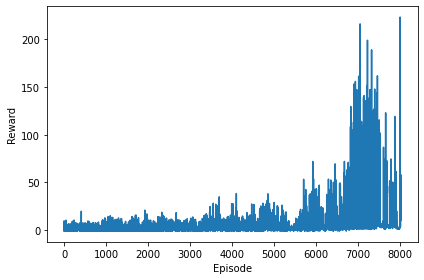

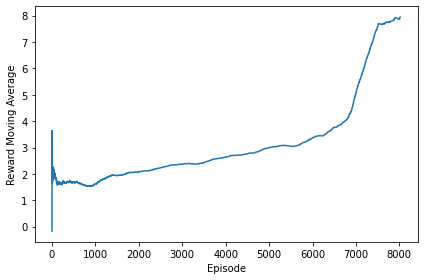

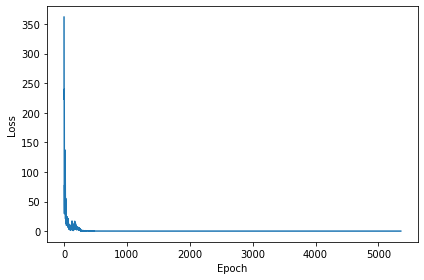

In [3]:
train_iter = 150000
agent_name = "DDQN_baseline_input_concat_large"
save_path = "saved_agent_DDQN_baseline_input_concat_large_{}".format(train_iter)
logs_dir="tf_logs_DDQN_baseline_input_concat_large"
batch_size = 32 
num_pre_training_steps = 0
num_frames = 4
learning_rate = 0.00001

# Register custom reward for training
cr = env_train._reward_helper.template_reward
#cr.addReward("overflow", CloseToOverflowReward(), 1.0)
cr.addReward("game", GameplayReward(), 1.0)
#cr.addReward("recolines", LinesReconnectedReward(), 1.0)
cr.addReward("l2rpn", L2RPNReward(), 2.0/float(env_train.n_line))
# Initialize custom rewards
cr.initialize(env_train)
# Set reward range to something managable
cr.set_range(-1.0, 1.0)

env_train.seed(0)

train(env_train,
      name=agent_name,
      iterations=train_iter,
      save_path=save_path,
      load_path=None, 
      logs_path=logs_dir,
      num_frames = num_frames,
      num_pre_training_steps= num_pre_training_steps,
      batch_size=batch_size,
      learning_rate=learning_rate)

In [25]:
steps = list(range(1000, 150001, 1000))
paths = []
for step in steps:
    path = r"saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large{}.h5".format(step)
    paths.append(path)
#     print(path)

In [27]:
nb_scenario = 5
scores = []
my_score = ScoreL2RPN2020(env_train,
                          nb_scenario=nb_scenario,
                          env_seeds=[0 for _ in range(nb_scenario)],
                          agent_seeds=[0 for _ in range(nb_scenario)])

for path in paths:
    agent = D3QNAgent(env_train.observation_space,
                      env_train.action_space,
                      name="DDQN_baseline_input_concat_large",
                      is_training=False)
    agent.load(path)
    scores.append(my_score.get(agent))

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large1000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large2000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large3000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large4000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large5000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large6000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large7000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large66000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large67000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large68000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large69000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large70000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large71000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large72000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_conca

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large131000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large132000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large133000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large134000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large135000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large136000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large137000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_inpu

In [28]:
with open('D3QN_baseline_input_concat_large_train_scores.data', 'wb') as file:
    pickle.dump(scores, file)

# Validation

In [4]:
env_val = grid2op.make('l2rpn_neurips_2020_track1_large_val',
                       action_class=TopologyChangeAndDispatchAction,
                       reward_class=CombinedScaledReward)

In [5]:
steps = list(range(1000, 150001, 1000))
paths = []
for step in steps:
    path = r"saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large{}.h5".format(step)
    paths.append(path)
#     print(path)

In [6]:
nb_scenario = 5
scores = []

my_score = ScoreL2RPN2020(env_val,
                          nb_scenario=nb_scenario,
                          env_seeds=[0 for _ in range(nb_scenario)],
                          agent_seeds=[0 for _ in range(nb_scenario)])

for path in paths:
    agent = D3QNAgent(env_val.observation_space,
                      env_val.action_space,
                      name="DDQN_baseline_input_concat_large",
                      is_training=False)
    agent.load(path)
    scores.append(my_score.get(agent))


Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large1000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large2000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large3000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large4000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large5000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large6000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large7000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large66000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large67000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large68000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large69000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large70000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large71000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large72000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_conca

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large131000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large132000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large133000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large134000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large135000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large136000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large137000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_inpu

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large46000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large47000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large48000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large49000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large50000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large51000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large52000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_conca

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large111000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large112000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large113000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large114000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large115000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large116000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large117000.h5
Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_inpu

In [18]:
with open('D3QN_baseline_input_concat_large_scores.data', 'wb') as file:
    pickle.dump(scores, file)

In [19]:
scores_only = [score[0] for score in scores]
val_scores_avg = np.mean(scores_only, axis = 1)
best_agent = np.argmax(val_scores_avg)
print("the best agent index: {}".format(best_agent))

the best agent index: 88


# Test 

In [3]:
env_test = grid2op.make('l2rpn_neurips_2020_track1_large_test',
                        action_class=TopologyChangeAndDispatchAction,
                        reward_class=CombinedScaledReward)

# Only load 128 steps in ram
env_test.chronics_handler.set_chunk_size(128)

In [5]:
nb_scenario = 10
path = r"saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large89000.h5"
path_save =  "saved_agent_DDQN_baseline_input_concat_large_150000_results"
test_scores = []

agent = D3QNAgent(env_test.observation_space,
                  env_test.action_space,
                  name="DDQN_baseline_input_concat_large",
                  is_training=False)
agent.load(path)

for seed in range(3):
    path_save =  "saved_agent_DDQN_baseline_input_concat_large_150000_results{}".format(seed)
    my_score = ScoreL2RPN2020(env_test,
                              nb_scenario=nb_scenario,
                              env_seeds=[seed for _ in range(nb_scenario)],
                              agent_seeds=[seed for _ in range(nb_scenario)])

    test_scores.append(my_score.get(agent, path_save=path_save))
# print(test_scores)

Successfully loaded network from: saved_agent_DDQN_baseline_input_concat_large_150000\DDQN_baseline_input_concat_large89000.h5


In [8]:
test_scores_only = [score[0] for score in test_scores]

In [15]:
mean_test_scenarios_score = np.mean(test_scores_only, axis=0)
std_test_scenarios_score = np.std(test_scores_only, axis= 0)
mean_test_score = np.mean(mean_test_scenarios_score)
std_mean_test_score = np.std(mean_test_scenarios_score)

In [16]:
print("Test score over 10 scenarios (average over 3 runs): {} +\- {}".format(mean_test_scenarios_score, std_test_scenarios_score))
print("Mean test score: {} +\- {}".format(mean_test_score, std_mean_test_score))

Test score over 10 scenarios (average over 3 runs): [-27.86131309 -35.78605994  -7.52351916  -7.70104605 -37.30570258
 -20.2326474   -6.85442864  -4.69252976 -15.02720517 -51.17063048] +\- [29.19167109 29.62725979 13.86720181 14.1740492  26.77649991 29.43984792
 13.11605205 12.66445602 24.43715027 36.97980939]
Mean test score: -21.41550822410757 +\- 15.168695363982756


# Analysis


In [4]:
from grid2op.Episode import EpisodeData
from grid2op.Episode import EpisodeReplay

In [9]:
path_save = 'saved_agent_DDQN_baseline_input_concat_large_150000_results1'

In [13]:
episode_studied = "Scenario_april_062"
this_episode = EpisodeData.from_disk(path_save, episode_studied)

In [14]:
attacks =[]
timesteps = []
step = 0

for attack in this_episode.attacks:
    if attack != env_test.action_space():
        if attack not in attacks:
            attacks.append(attack)
            timesteps.append(step)
            print(attack)
            print(step)
    step += 1

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - Force disconnection of 1 powerlines ([23])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
277
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - Force disconnection of 1 powerlines ([56])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
328


In [15]:
step = 0
actions =[]
act_timesteps = []

for action in this_episode.actions:
    if action != env_test.action_space():
        if action not in actions:
            actions.append(action)
            timesteps.append(step)
            print(action)
            print(step)
    step += 1

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - Change the bus of the following element(s):
	 	 - Switch bus of line (origin) id 48 [on substation 16]
	 	 - Switch bus of generator id 8 [on substation 16]
	 - NOT force any particular bus configuration
3
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - Switch status of 1 powerlines ([12])
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
12
This action will:
	 - NOT change anything to the injections
	 - Modify the generators with redispatching in the following way:
	 	 - Redispatch "gen_41_19" of -2.60 MW
	 - NOT modify any storage capacity
	 - NOT perform any curtai

<ipython-input-18-eeb831afd14a>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


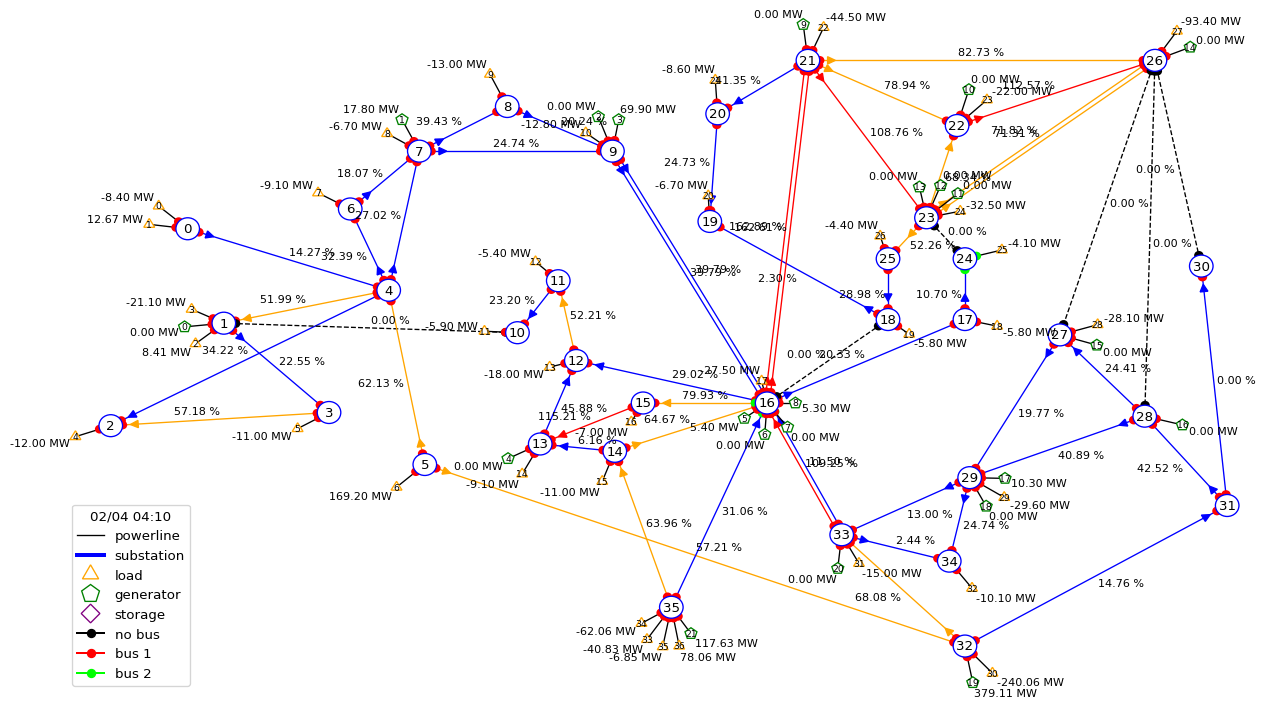

In [18]:
last_obs = copy.deepcopy(this_episode.observations[-1])

plot_helper1 = PlotMatplot(observation_space=this_episode.observation_space)
fig = plot_helper1.plot_obs(last_obs)
fig.savefig("last obs input_062")
fig.show()

In [19]:
path_save = 'saved_agent_DDQN_baseline_input_concat_large_150000_results1'

In [20]:
episode_studied = "Scenario_april_170"
this_episode = EpisodeData.from_disk(path_save, episode_studied)

In [7]:
attacks =[]
timesteps = []
step = 0

for attack in this_episode.attacks:
    if attack != env_test.action_space():
        if attack not in attacks:
            attacks.append(attack)
            timesteps.append(step)
            print(attack)
            print(step)
    step += 1
    


This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - Force disconnection of 1 powerlines ([23])
	 - NOT switch any line status
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
277


In [8]:
step = 0
actions =[]
act_timesteps = []

for action in this_episode.actions:
    if action != env_test.action_space():
        if action not in actions:
            actions.append(action)
            timesteps.append(step)
            print(action)
            print(step)
    step += 1
    

This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - NOT switch any line status
	 - Change the bus of the following element(s):
	 	 - Switch bus of line (origin) id 48 [on substation 16]
	 	 - Switch bus of generator id 8 [on substation 16]
	 - NOT force any particular bus configuration
3
This action will:
	 - NOT change anything to the injections
	 - NOT perform any redispatching action
	 - NOT modify any storage capacity
	 - NOT perform any curtailment
	 - NOT force any line status
	 - Switch status of 1 powerlines ([12])
	 - NOT switch anything in the topology
	 - NOT force any particular bus configuration
277


<ipython-input-21-cc324c2fd535>:6: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


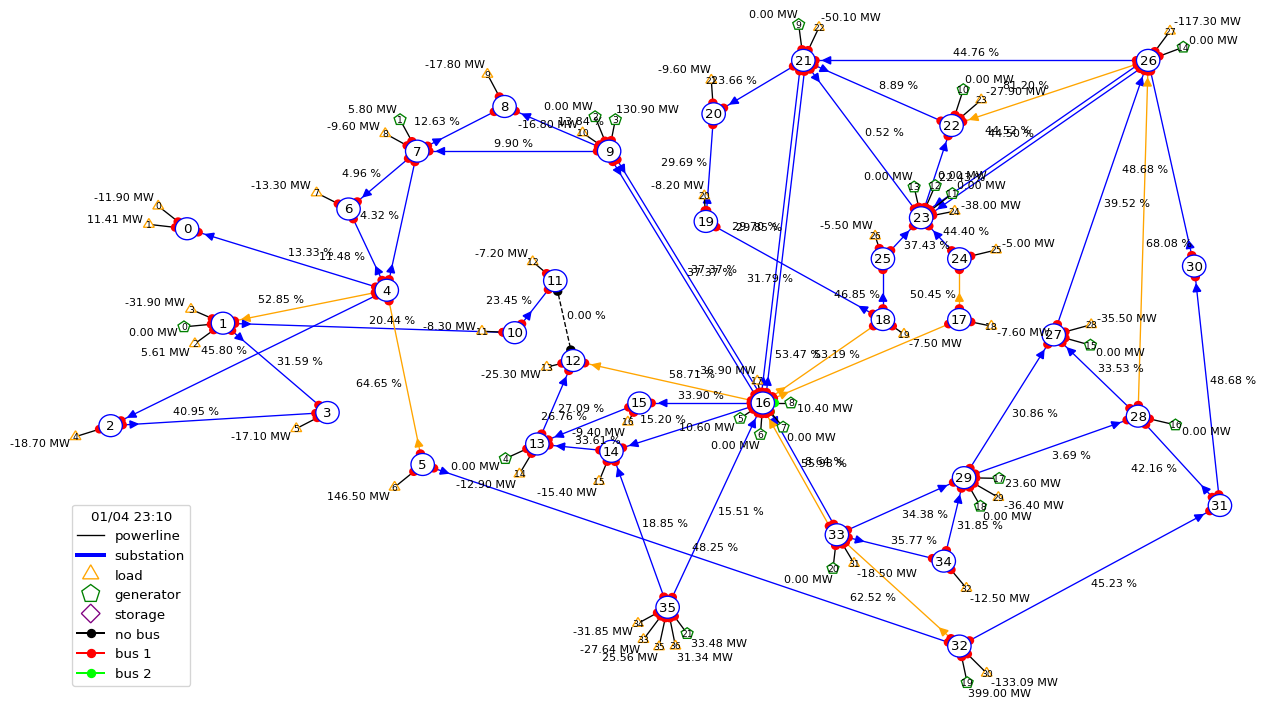

In [21]:
last_obs = copy.deepcopy(this_episode.observations[-1])

plot_helper1 = PlotMatplot(observation_space=this_episode.observation_space)
fig = plot_helper1.plot_obs(last_obs)
fig.savefig("last obs input 170")
fig.show()